In [ ]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Not connected to a GPU')
else:
  print(gpu_info)

Sun Jan 14 06:32:25 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  NVIDIA A100-SXM4-40GB          Off | 00000000:00:04.0 Off |                    0 |
| N/A   36C    P0              47W / 400W |      2MiB / 40960MiB |      0%      Default |
|                                         |                      |             Disabled |
+-----------------------------------------+----------------------+--

In [ ]:
!pip install ultralytics
import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.1.1 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)
Setup complete ✅ (12 CPUs, 83.5 GB RAM, 26.3/166.8 GB disk)


# install YOLOv8

In [ ]:
from ultralytics import YOLO
import os
from IPython import display as ipy_display  # renamed to avoid conflict
from IPython.display import Image

ipy_display.clear_output()  # Call clear_output on the module, not the function

!yolo mode=checks  # This line might not work as expected in an IPython environment


Traceback (most recent call last):
  File "/usr/local/bin/yolo", line 8, in <module>
    sys.exit(entrypoint())
  File "/usr/local/lib/python3.10/dist-packages/ultralytics/cfg/__init__.py", line 508, in entrypoint
    raise ValueError(f"Invalid 'mode={mode}'. Valid modes are {MODES}.\n{CLI_HELP_MSG}")
ValueError: Invalid 'mode=<module 'ultralytics.utils.checks' from '/usr/local/lib/python3.10/dist-packages/ultralytics/utils/checks.py'>'. Valid modes are ('train', 'val', 'predict', 'export', 'track', 'benchmark').

    Arguments received: ['yolo', 'mode=checks']. Ultralytics 'yolo' commands use the following syntax:

        yolo TASK MODE ARGS

        Where   TASK (optional) is one of ('detect', 'segment', 'classify', 'pose', 'obb')
                MODE (required) is one of ('train', 'val', 'predict', 'export', 'track', 'benchmark')
                ARGS (optional) are any number of custom 'arg=value' pairs like 'imgsz=320' that override defaults.
                    See all ARGS at ht

# Train YOLOv8 Model on Custom Dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
dataset = '/content/drive/My Drive/sony/'

In [ ]:
model = YOLO("yolov8n.pt")  # load a pretrained model (recommended for training)

100%|██████████| 6.23M/6.23M [00:00<00:00, 98.3MB/s]


In [ ]:
!yolo task=detect mode=train model='/content/drive/My Drive/sony/train/yolov8n.pt' data='/content/drive/My Drive/sony/data.yaml' epochs=20 batch=10 imgsz=1024 freeze=0-20

Ultralytics YOLOv8.1.1 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)
engine/trainer: task=detect, mode=train, model=/content/drive/My Drive/sony/train/yolov8n.pt, data=/content/drive/My Drive/sony/data.yaml, epochs=20, time=None, patience=50, batch=10, imgsz=1024, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=-20, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False

In [ ]:
!ls /content/runs/detect/train/weights

best.pt  last.pt


In [ ]:
from google.colab import files

# Download the best model weights
files.download('/content/runs/detect/train/weights/best.pt')

# Download the last model weights
files.download('/content/runs/detect/train/weights/last.pt')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

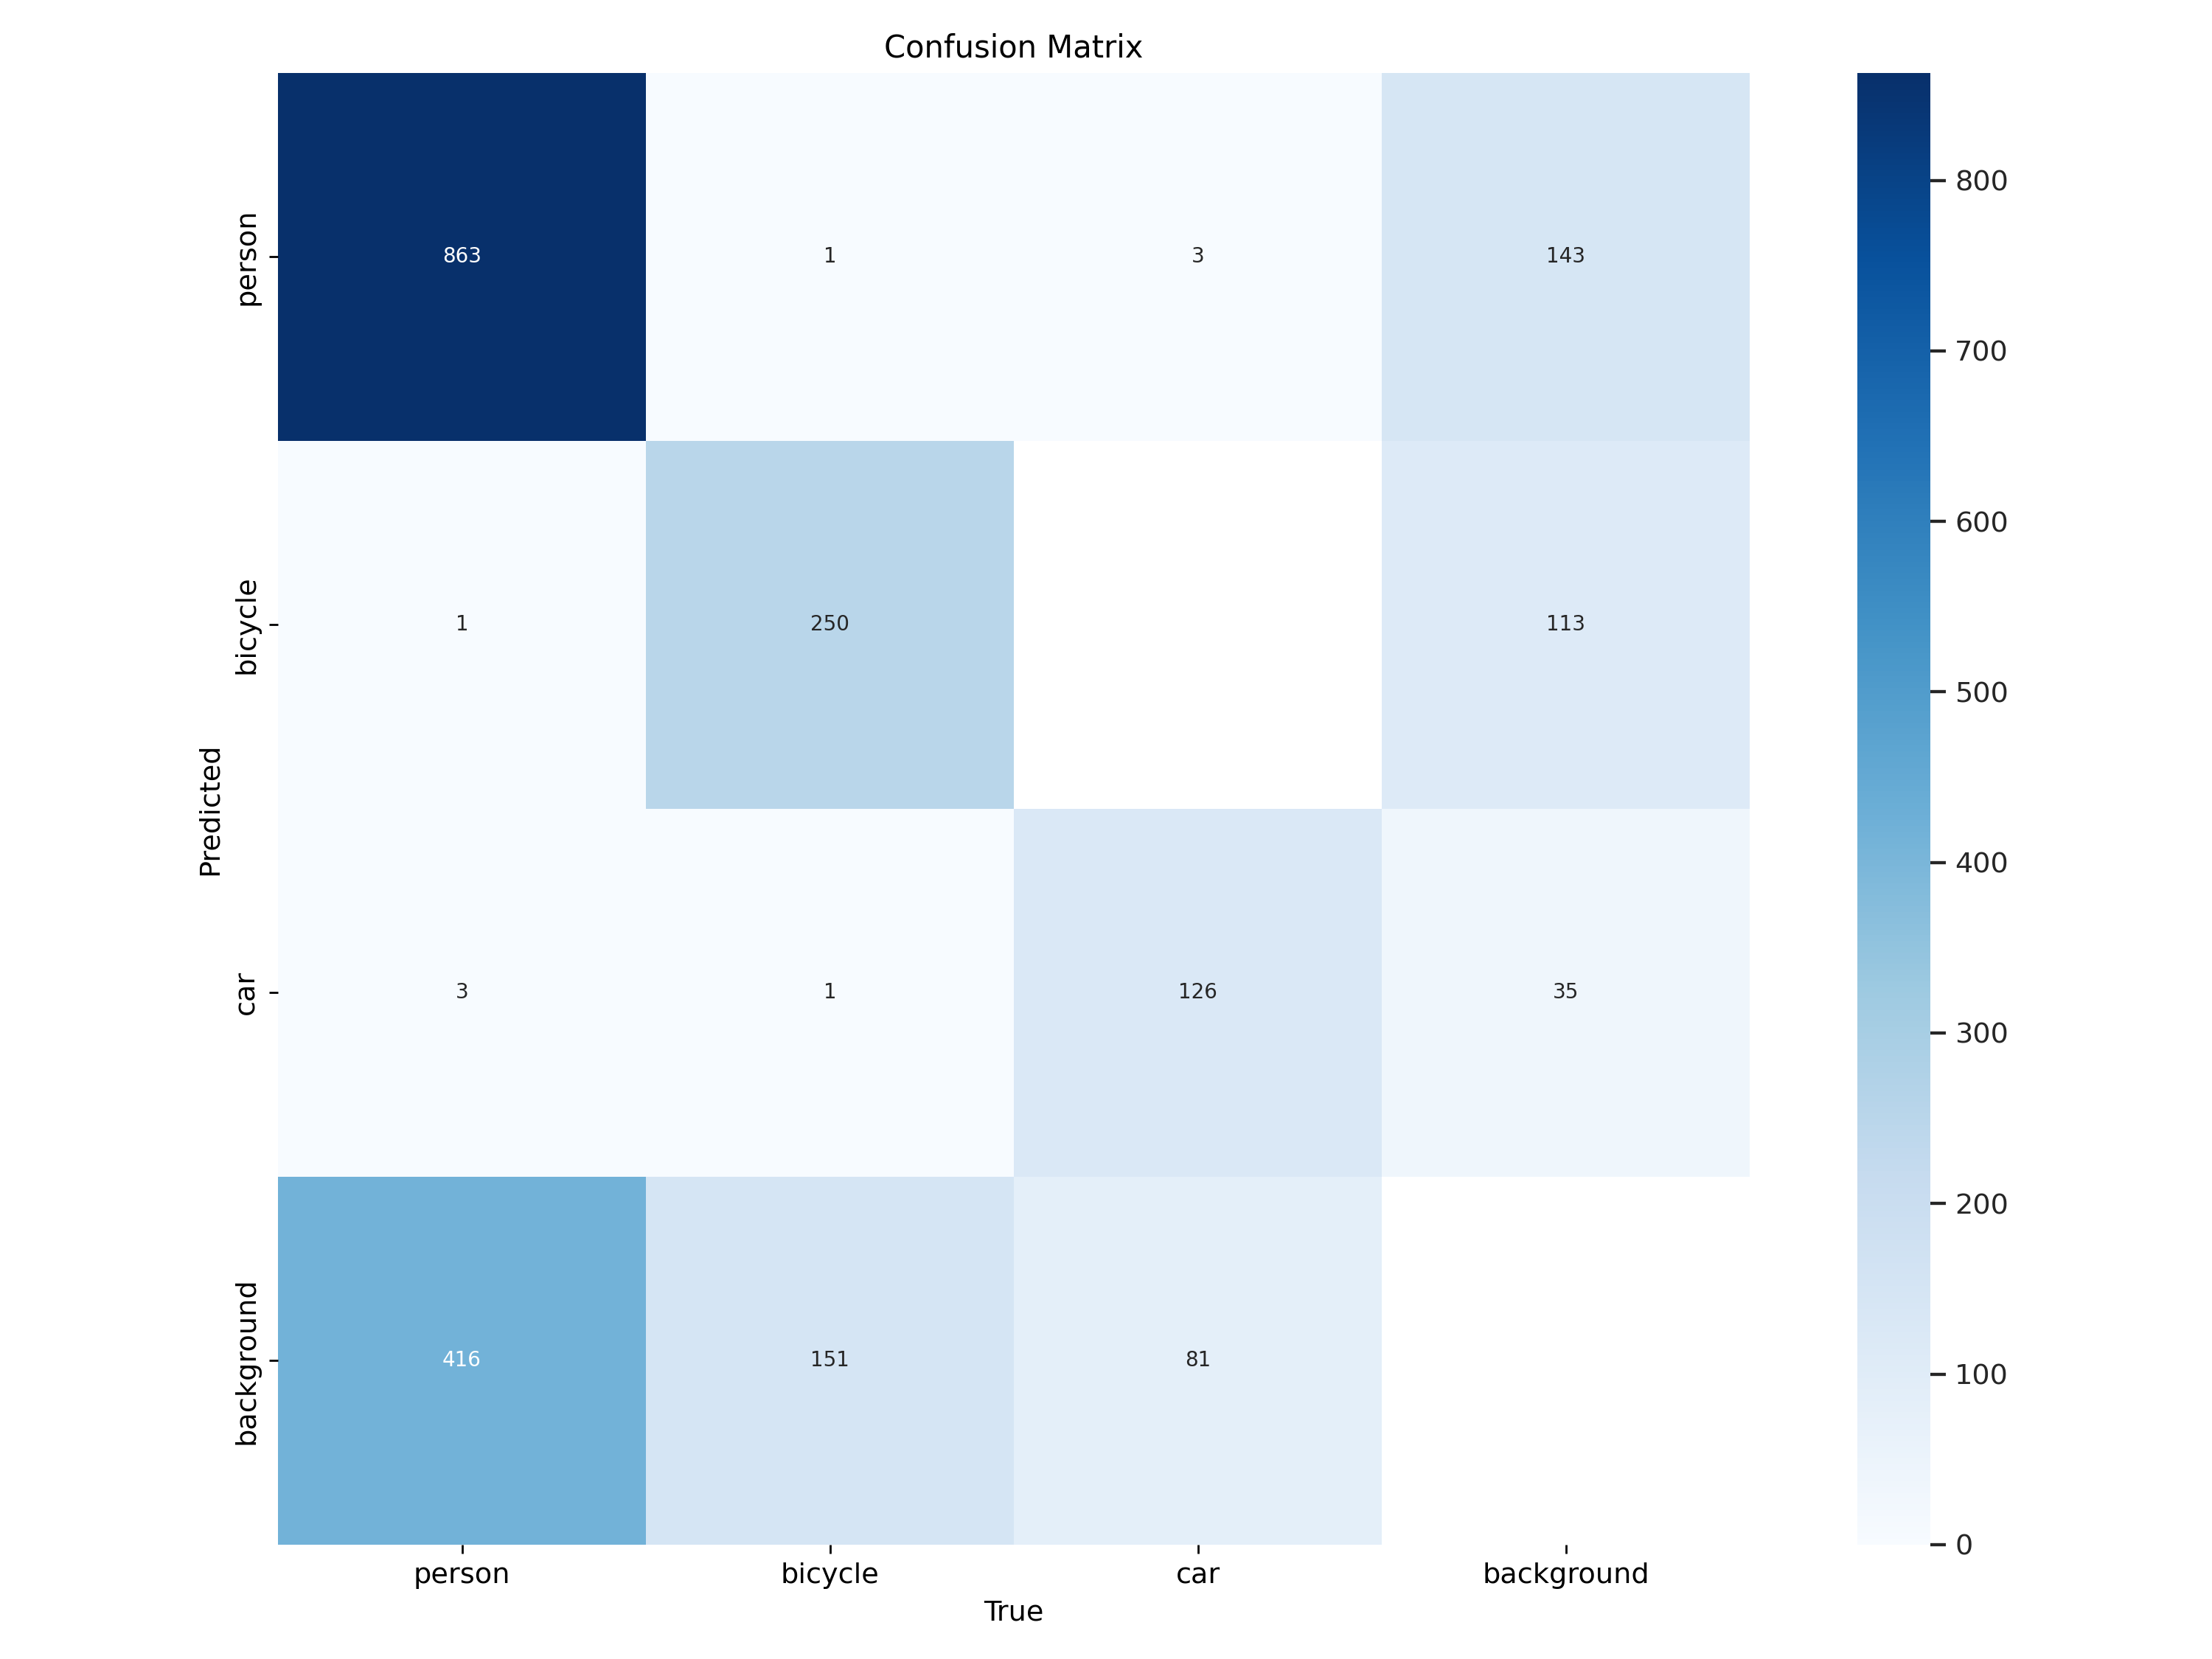

In [ ]:
from IPython.display import Image

# Replace 'train' with 'train' if that's where your output is, and adjust the filename if needed
Image(filename="/content/runs/detect/train/confusion_matrix.png", width=800)

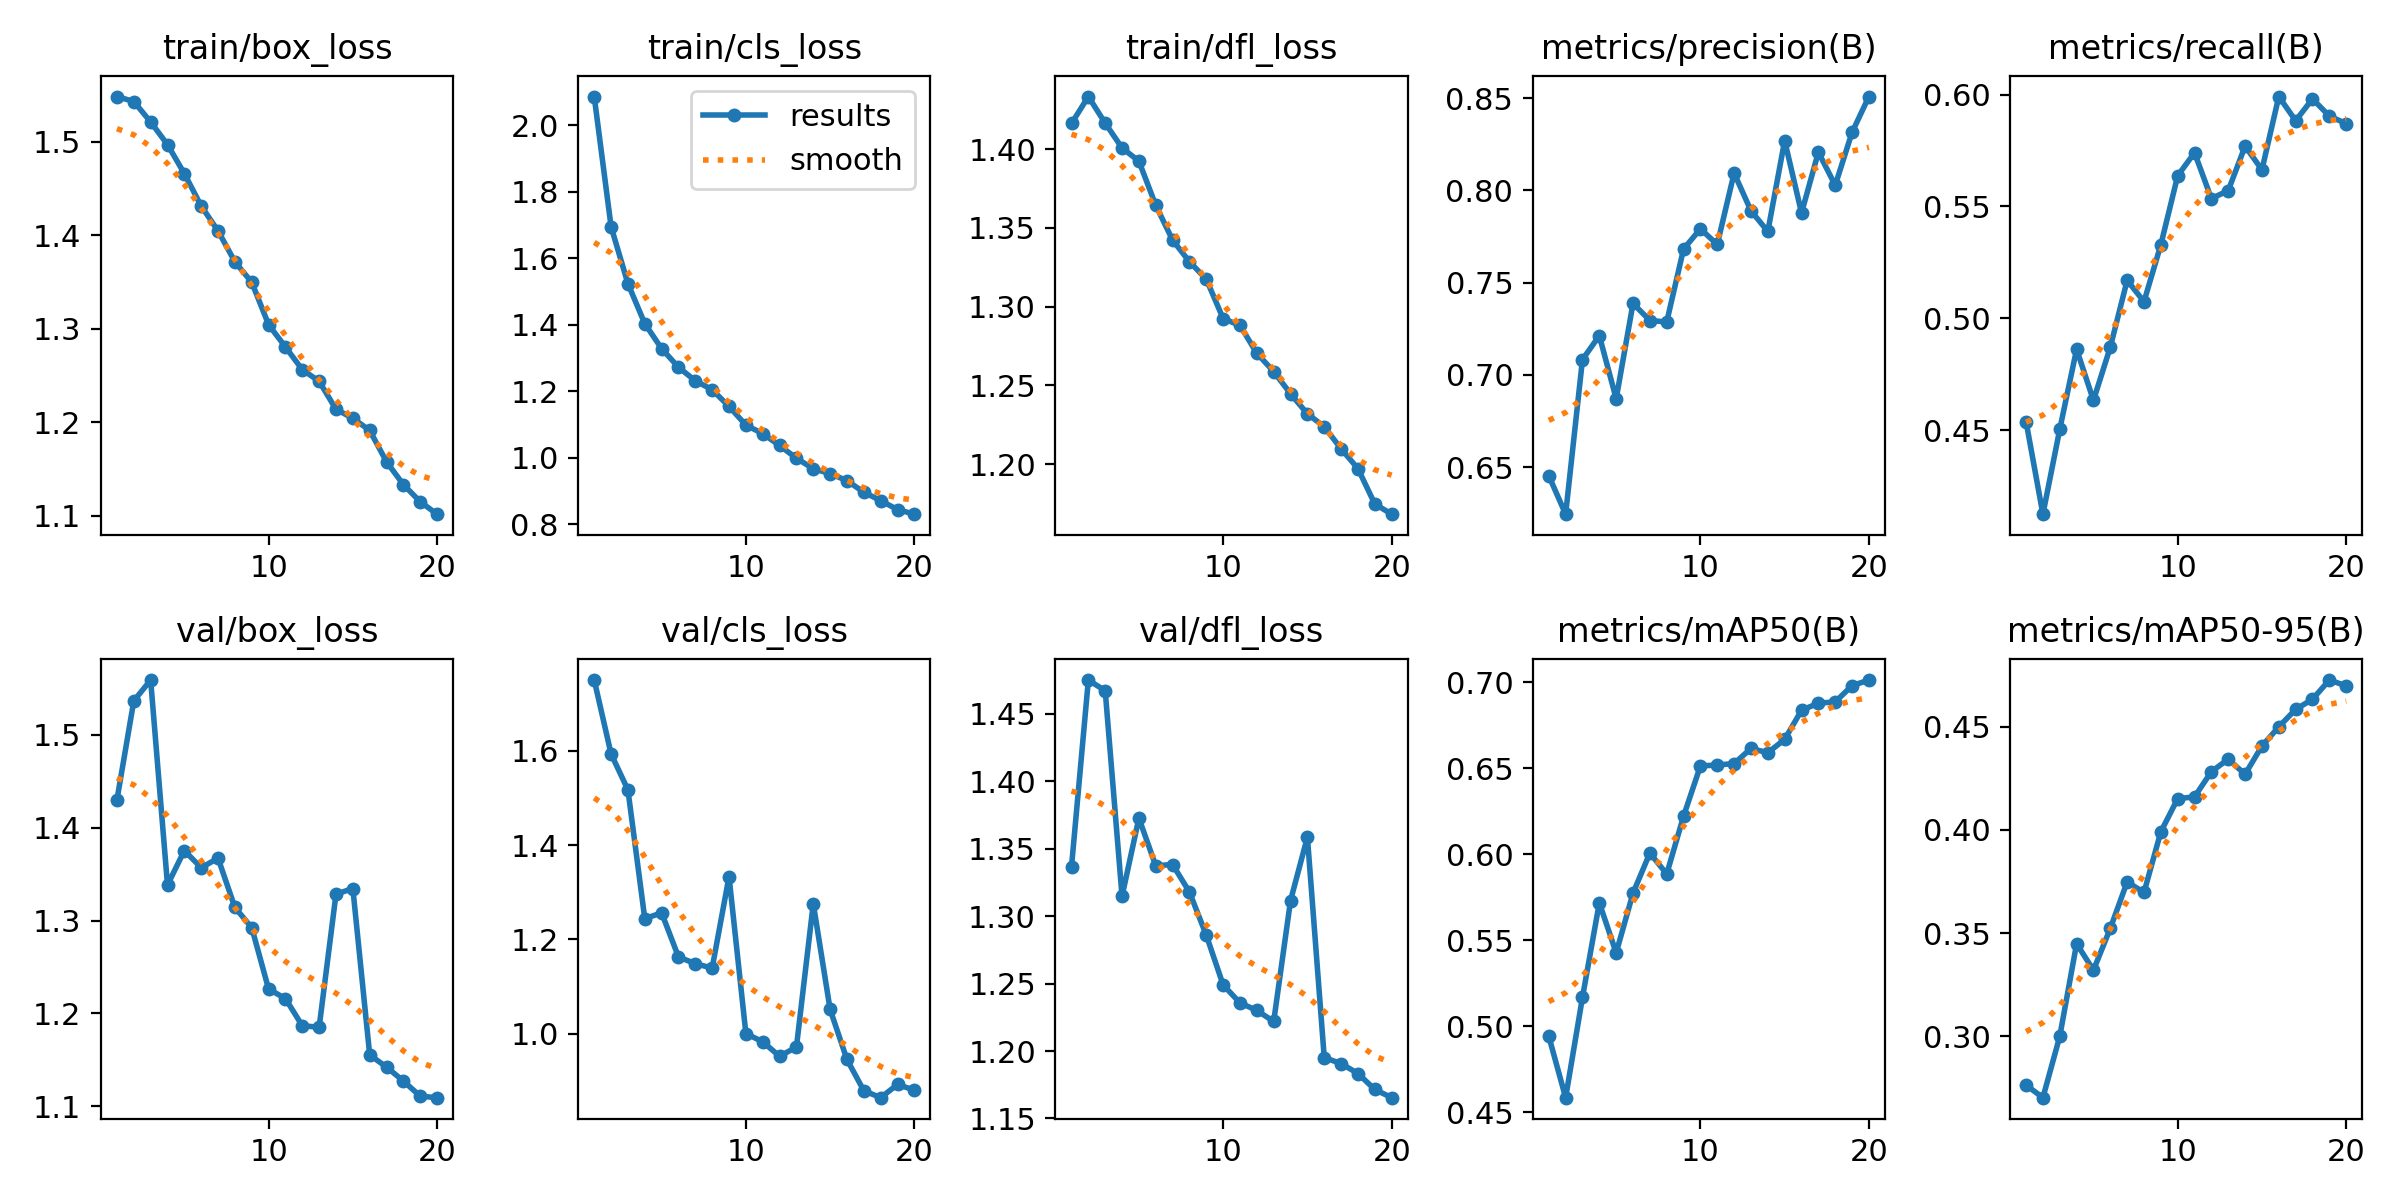

In [ ]:
from IPython.display import Image

# Make sure that the filename is correct and the file exists at this path
Image(filename="/content/runs/detect/train/results.png", width=600)

In [ ]:
!yolo task=detect mode=val model='/content/runs/detect/train/weights/best.pt' data='/content/drive/My Drive/sony/data.yaml'

Ultralytics YOLOv8.1.1 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)
Model summary (fused): 168 layers, 3006233 parameters, 0 gradients, 8.1 GFLOPs
val: Scanning /content/drive/My Drive/sony/val/labels.cache... 321 images, 0 backgrounds, 0 corrupt: 100% 321/321 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  10% 2/21 [00:11<01:28,  4.65s/it]WARNING ⚠️ NMS time limit 1.300s exceeded
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 21/21 [00:25<00:00,  1.22s/it]
                   all        321       1896      0.828      0.582      0.687      0.465
                person        321       1283      0.891      0.636      0.738      0.514
               bicycle        321        403      0.739      0.548      0.658      0.417
                   car        321        210      0.855      0.561      0.664      0.465
Speed: 1.6ms preprocess, 6.0ms inference, 0

In [ ]:
!ls /content/runs/detect/val

confusion_matrix_normalized.png  P_curve.png   val_batch0_labels.jpg  val_batch1_pred.jpg
confusion_matrix.png		 PR_curve.png  val_batch0_pred.jpg    val_batch2_labels.jpg
F1_curve.png			 R_curve.png   val_batch1_labels.jpg  val_batch2_pred.jpg


In [ ]:
from google.colab import files

# Download confusion matrix
files.download('/content/runs/detect/val/confusion_matrix.png')

# Download PR curve
files.download('/content/runs/detect/val/PR_curve.png')

# Download a sample prediction image
files.download('/content/runs/detect/val/val_batch0_pred.jpg')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
!yolo task=detect mode=predict model='/content/runs/detect/train/weights/best.pt' conf=0.5 source='/content/drive/My Drive/sony/test/images'

Ultralytics YOLOv8.1.1 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)
Model summary (fused): 168 layers, 3006233 parameters, 0 gradients, 8.1 GFLOPs

image 1/321 /content/drive/My Drive/sony/test/images/DSC01096.JPG: 704x1024 2 persons, 131.7ms
image 2/321 /content/drive/My Drive/sony/test/images/DSC01100.JPG: 704x1024 5 persons, 9 bicycles, 1 car, 8.2ms
image 3/321 /content/drive/My Drive/sony/test/images/DSC01101.JPG: 704x1024 5 persons, 2 bicycles, 2 cars, 8.1ms
image 4/321 /content/drive/My Drive/sony/test/images/DSC01111.JPG: 704x1024 2 persons, 9.9ms
image 5/321 /content/drive/My Drive/sony/test/images/DSC01116.JPG: 704x1024 1 bicycle, 8.0ms
image 6/321 /content/drive/My Drive/sony/test/images/DSC01120.JPG: 704x1024 1 car, 7.8ms
image 7/321 /content/drive/My Drive/sony/test/images/DSC01128.JPG: 704x1024 1 person, 7.8ms
image 8/321 /content/drive/My Drive/sony/test/images/DSC01140.JPG: 704x1024 4 cars, 9.3ms
image 9/321 /content/drive/My Drive/sony/tes

#*download some predicted*

In [ ]:
!ls /content/runs/detect/predict

In [ ]:
import os
import shutil

# Define the source and destination directories
source_dir = '/content/runs/detect/predict'
dest_dir = '/content/selected_predictions'

# Create the destination directory if it doesn't exist
if not os.path.exists(dest_dir):
    os.makedirs(dest_dir)

# Copy the first 20 images
files = sorted(os.listdir(source_dir))[:20]
for file in files:
    shutil.copy(os.path.join(source_dir, file), dest_dir)

# Compress the selected predictions
!zip -r /content/selected_predictions.zip /content/selected_predictions

  adding: content/selected_predictions/ (stored 0%)
  adding: content/selected_predictions/DSC01212.JPG (deflated 1%)
  adding: content/selected_predictions/DSC01199.JPG (deflated 1%)
  adding: content/selected_predictions/DSC01100.JPG (deflated 1%)
  adding: content/selected_predictions/DSC01116.JPG (deflated 1%)
  adding: content/selected_predictions/DSC01175.JPG (deflated 1%)
  adding: content/selected_predictions/DSC01166.JPG (deflated 1%)
  adding: content/selected_predictions/DSC01120.JPG (deflated 1%)
  adding: content/selected_predictions/DSC01185.JPG (deflated 1%)
  adding: content/selected_predictions/DSC01111.JPG (deflated 1%)
  adding: content/selected_predictions/DSC01177.JPG (deflated 1%)
  adding: content/selected_predictions/DSC01150.JPG (deflated 1%)
  adding: content/selected_predictions/DSC01206.JPG (deflated 1%)
  adding: content/selected_predictions/DSC01172.JPG (deflated 1%)
  adding: content/selected_predictions/DSC01169.JPG (deflated 1%)
  adding: content/select

In [ ]:
from google.colab import files
files.download('/content/selected_predictions.zip')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>